# Libraries to Import

In [26]:
import warnings
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt

# Initializing Important Variables

In [2]:
batch_size = 7
num_classes = 9
epochs = 20
model_name = "tomato.h5"
save_path = ""

path_to_train = "train"
path_to_test = "test"

# DataGenerator

In [4]:
Generator = ImageDataGenerator()
train_data = Generator.flow_from_directory(path_to_train, (100, 100), batch_size=batch_size)

test_data = Generator.flow_from_directory(path_to_test, (100, 100), batch_size=batch_size)

Found 4575 images belonging to 9 classes.
Found 1357 images belonging to 9 classes.


# Defining a Model

In [18]:
model = Sequential()

model.add(Conv2D(16, (5, 5), input_shape=(100, 100, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(64, (5, 5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 96, 96, 16)        1216      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 18, 18, 64)       

# Model Compilation

In [19]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Training

In [20]:
hist=model.fit(train_data,
                    steps_per_epoch=1000//batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=test_data, validation_steps = 3)

model.save(model_name)

Epoch 1/20
142/142 [==============================] - 17s 114ms/step - loss: 1.3659 - accuracy: 0.6922 - val_loss: 0.8443 - val_accuracy: 0.8095
Epoch 2/20
142/142 [==============================] - 16s 110ms/step - loss: 0.8542 - accuracy: 0.7817 - val_loss: 1.2679 - val_accuracy: 0.5714
Epoch 3/20
142/142 [==============================] - 16s 110ms/step - loss: 0.5920 - accuracy: 0.8375 - val_loss: 0.2166 - val_accuracy: 0.9048
Epoch 4/20
142/142 [==============================] - 16s 110ms/step - loss: 0.2943 - accuracy: 0.9034 - val_loss: 0.7004 - val_accuracy: 0.8095
Epoch 5/20
142/142 [==============================] - 16s 112ms/step - loss: 0.2335 - accuracy: 0.9356 - val_loss: 1.1946 - val_accuracy: 0.5238
Epoch 6/20
142/142 [==============================] - 18s 127ms/step - loss: 0.1667 - accuracy: 0.9497 - val_loss: 0.6578 - val_accuracy: 0.7619
Epoch 7/20
142/142 [==============================] - 23s 162ms/step - loss: 0.0264 - accuracy: 0.9930 - val_loss: 0.3008 - val_ac

# Evaluate Model

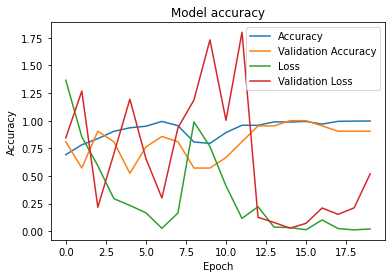

In [22]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()

In [25]:
train_loss, train_acc = model.evaluate(train_data)
test_loss, test_acc = model.evaluate(test_data)

print("Train accuracy:", round(train_acc, 5))
print("Train loss:", round(train_loss, ))

print("Test accuracy:", round(test_acc, 5))
print("Test loss:", round(test_loss, 3))

194/194 [==============================] - 7s 34ms/step - loss: 0.2693 - accuracy: 0.9514
Train accuracy: 0.99803
Train loss: 0
Test accuracy: 0.95136
Test loss: 0.269


# Predicting

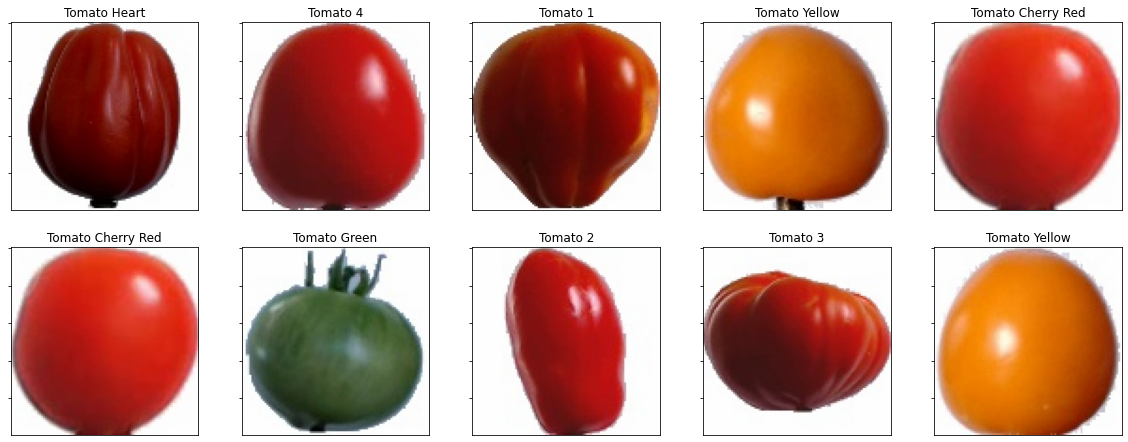

In [30]:
class Tomato:
    
    def __init__(self, img_dir = ''):
        self.img_dir = img_dir
        self.cnt = 0
        self.batch_holder = None
        self.model = load_model(model_name)
        self.Label_dict = labels =  {'Tomato 1': 0,
             'Tomato 2': 1,
             'Tomato 3': 2,
             'Tomato 4': 3,
             'Tomato Cherry Red': 4,
             'Tomato Heart': 5,
             'Tomato Maroon': 6,
             'Tomato Yellow': 7,                        
             'Tomato Green': 8 }
        self.label = list(self.Label_dict.keys())
    def read_images(self):
        self.cnt = len(os.listdir(self.img_dir))
        self.batch_holder = np.zeros((self.cnt, 100, 100, 3))
        for i,img in enumerate(os.listdir(self.img_dir)):
            img = image.load_img(os.path.join(self.img_dir,img), target_size=(100, 100))
            self.batch_holder[i, :] = img
        return self.batch_holder
    
    def predict(self):
        fig = plt.figure(figsize=(20, 20))
        for i,img in enumerate(self.batch_holder):
            fig.add_subplot(5, 5, i+1)
            result=self.model.predict(self.batch_holder)
            result_classes = result.argmax(axis=-1)
            plt.title(self.label[result_classes[i]])
            plt.tick_params(
                axis='both',        
                which='both',      
                bottom=False,      
                top=False,         
                labelbottom=False,
                labelleft=False)
            plt.imshow(img/256.)
        plt.show()
obj = Tomato('predict')
obj.read_images()
obj.predict()
